# Our Model Design

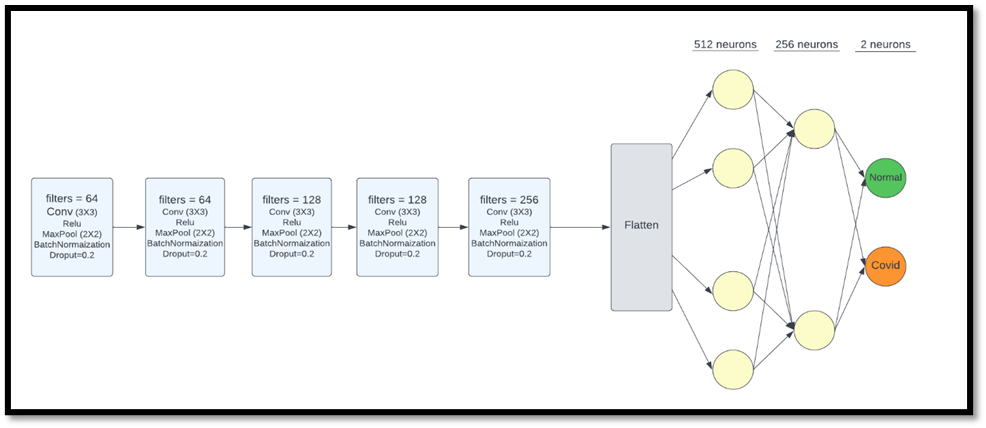

## Importing Libraries

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from keras import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

import joblib

## Preparing Input

In [ ]:
BATCH_SIZE = 16
IMG_SIZE = (256, 256)
BASE_DIR = './drive/MyDrive/Minor Project'
TRAIN_DIR = os.path.join(BASE_DIR, 'Dataset/train')
TEST_DIR = os.path.join(BASE_DIR, 'Dataset/test')
VAL_DIR = os.path.join(BASE_DIR, 'Dataset/Validation')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(
        VAL_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = False,
        class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = False,
        class_mode = 'categorical')

Found 10356 images belonging to 2 classes.
Found 1381 images belonging to 2 classes.
Found 2071 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1}

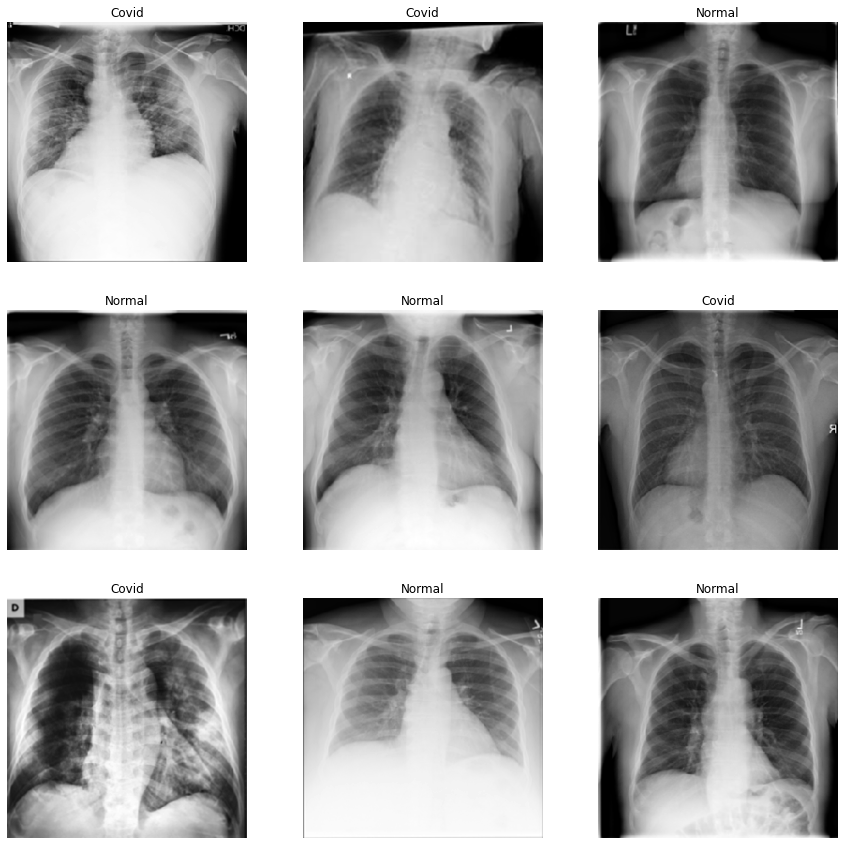

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    plt.imshow(np.squeeze(img[0]), cmap='gray')
    dic = {0:'Covid', 1:'Normal'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

## Model Definition

In [ ]:
def Our_Model(IMG_SIZE):
  IP_Shape = IMG_SIZE + (1, )
  model = Sequential([
    Conv2D(64, activation='relu', padding='same', kernel_size=(3, 3), input_shape=IP_Shape),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Conv2D(64, activation='relu', padding='same', kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Conv2D(128, activation='relu', padding='same', kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Conv2D(128, activation='relu', padding='same', kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Conv2D(256, activation='relu', padding='same', kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    BatchNormalization(axis=-1),
    Dense(2, activation='sigmoid')
  ]) 
  return model

In [ ]:
Covid_model = Our_Model(IMG_SIZE)
Covid_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0

## Model Training

In [ ]:
base_learning_rate = 0.001
Covid_model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
initial_epochs = 20
history = Covid_model.fit(train_generator, epochs=initial_epochs, validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/20
648/648 [==============================] - 889s 1s/step - loss: 0.3890 - accuracy: 0.8363 - val_loss: 1.9010 - val_accuracy: 0.2629
Epoch 2/20
648/648 [==============================] - 134s 206ms/step - loss: 0.2718 - accuracy: 0.8865 - val_loss: 0.2707 - val_accuracy: 0.8914
Epoch 3/20
648/648 [==============================] - 131s 201ms/step - loss: 0.2322 - accuracy: 0.9074 - val_loss: 0.8516 - val_accuracy: 0.6227
Epoch 4/20
648/648 [==============================] - 131s 202ms/step - loss: 0.1995 - accuracy: 0.9227 - val_loss: 0.5403 - val_accuracy: 0.7690
Epoch 5/20
648/648 [==============================] - 131s 202ms/step - loss: 0.1919 - accuracy: 0.9259 - val_loss: 0.6402 - val_accuracy: 0.7046


## Model Training Evaluation

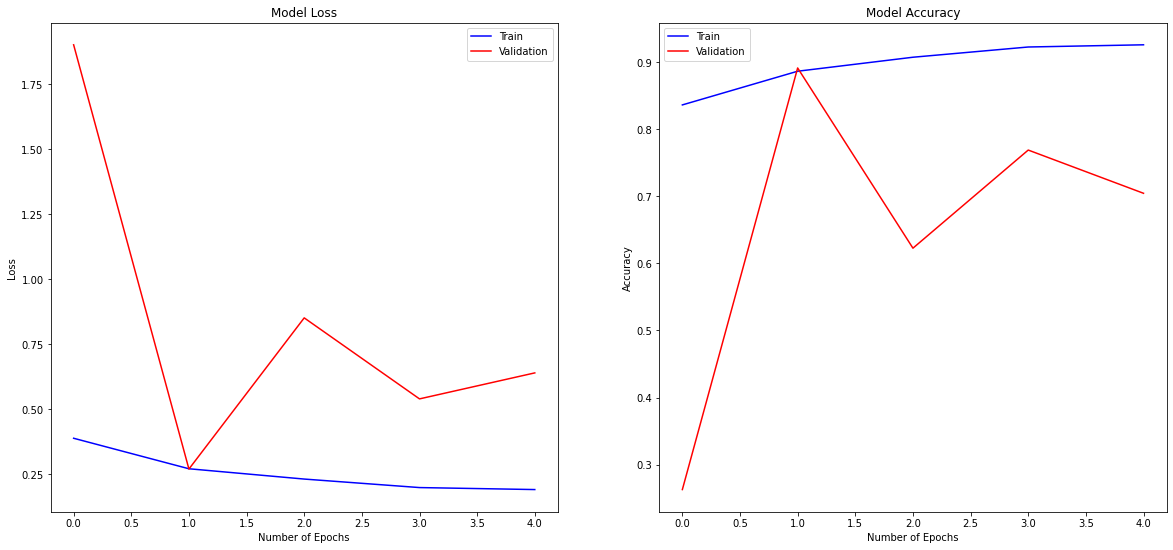

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(train_loss))
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, color='b', label='Train')
plt.plot(epochs, val_loss, color='r', label='Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(epochs, acc, color='b', label='Train')
plt.plot(epochs, val_acc, color='r', label='Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()

In [ ]:
yp_test = Covid_model.predict(test_generator)
yp_test = list(np.argmax(yp_test, axis=-1))
yo_test = test_generator.classes


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       542
           1       0.92      0.94      0.93      1529

    accuracy                           0.90      2071
   macro avg       0.87      0.86      0.87      2071
weighted avg       0.90      0.90      0.90      2071



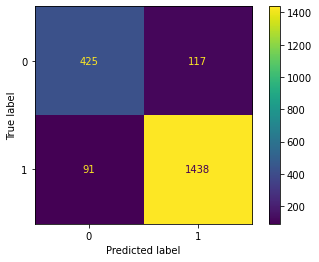

In [ ]:
cm_test = ConfusionMatrixDisplay(confusion_matrix(yo_test, yp_test))
cm_test.plot()
print("\nClassification Report for Test Data\n")
print(classification_report(yo_test, yp_test))

In [ ]:
joblib.dump(Covid_model, os.path.join(BASE_DIR, 'Covid_model.joblib'))

INFO:tensorflow:Assets written to: ram://58eb2b7e-2d59-4a39-b120-bd4308871096/assets


['./drive/MyDrive/Minor Project/Covid_model.joblib']